C221011 김수민

# 1. 이항 로지스틱 회귀모형 연습

데이터준비
- 로지스틱 회귀 모형을 적용하기 위한 가상 데이터 생성

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
n=100
np.random.seed(0)
#균등 분포(Uniform Distribution)
sbp=np.random.uniform(110,170,n)
#정규분포
diagnosis_error=np.random.normal(0,5,n)
sbp_diagnosis=sbp+diagnosis_error

#수축기 혈압 140이상에 대해 고혈압 진단(0:정상, 1: 고혈압)
hypertension=np.where(sbp_diagnosis >=140,1,0)

df=pd.DataFrame({
    'sbp':sbp,
    'hypertension':hypertension
})

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sbp           100 non-null    float64
 1   hypertension  100 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.3 KB
None


In [26]:
df.head()

,sbp,hypertension
0,142.928810,0
1,152.911362,1
2,146.165803,1
3,142.692991,0
4,135.419288,1


수출기혈압(sbp)와 고혈압 진단(hypertension) 간의 관계를 시각화

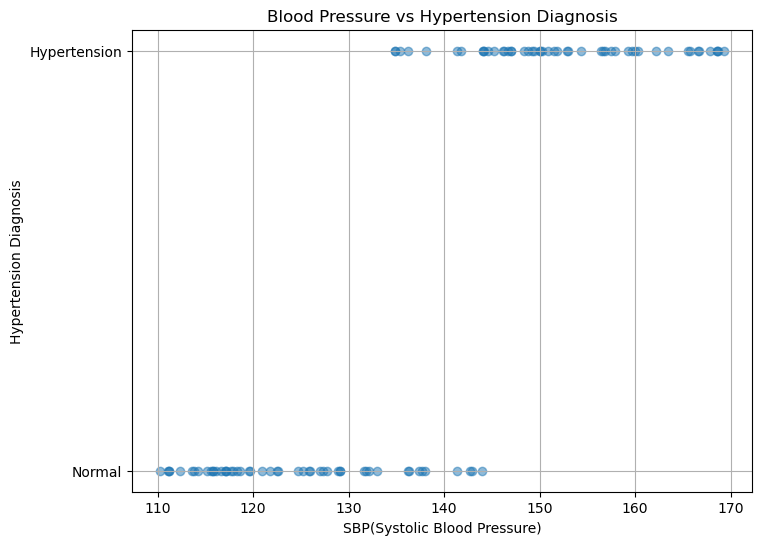

In [27]:
plt.figure(figsize=(8,6))

plt.scatter(df['sbp'],df['hypertension'],alpha=0.5)


# 제목, x축, y축 레이블 설정
plt.title('Blood Pressure vs Hypertension Diagnosis')
plt.xlabel('SBP(Systolic Blood Pressure)')
plt.ylabel('Hypertension Diagnosis')
plt.yticks([0, 1], ['Normal', 'Hypertension'])
plt.grid()
plt.show()

선형회귀모형적용

In [28]:
formula_linear='hypertension~sbp'
model_linear=smf.ols(formula_linear,data=df).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           hypertension   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.25e-26
Time:                        22:19:10   Log-Likelihood:                -14.108
No. Observations:                 100   AIC:                             32.22
Df Residuals:                      98   BIC:                             37.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8209      0.227    -12.433      0.000      -3.271      -2.371
sbp            0.0240      0.002     14.750      0.000       0.021       0.027
==============================================================================
Omnibus:                        0.560   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.706
Skew:                          -0.122   Prob(JB):                        0.703
Kurtosis:                       2.668   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

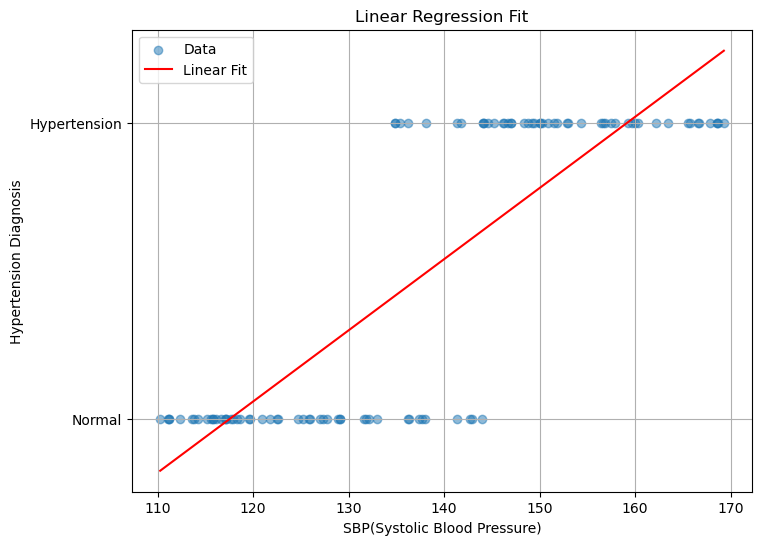

In [29]:
plt.figure(figsize=(8,6))

plt.scatter(df['sbp'],df['hypertension'],alpha=0.5, label='Data')

x=pd.DataFrame({'sbp': np.linspace(df['sbp'].min(),df['sbp'].max(),100)})
plt.plot(x.sbp, model_linear.predict(x.sbp),color='red', label='Linear Fit')

# 제목, x축, y축 레이블 설정
plt.title('Linear Regression Fit')
plt.xlabel('SBP(Systolic Blood Pressure)')
plt.ylabel('Hypertension Diagnosis')
plt.yticks([0, 1], ['Normal', 'Hypertension'])
plt.grid()
plt.legend()
plt.show()

이항 로지스틱 회귀모형 적용

In [30]:
formula_logit='hypertension~sbp'

model_logit=smf.logit(formula_logit,data=df).fit()

print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.177347
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           hypertension   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                  0.7441
Time:                        22:19:10   Log-Likelihood:                -17.735
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 3.092e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.2927     10.232     -4.231      0.000     -63.347     -23.239
sbp            0.3118      0.

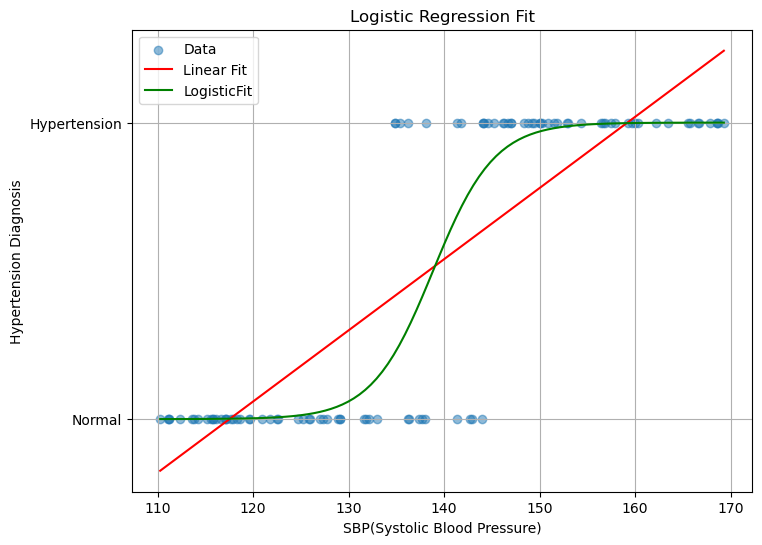

In [31]:
plt.figure(figsize=(8,6))

plt.scatter(df['sbp'],df['hypertension'],alpha=0.5,label='Data')

x=pd.DataFrame({'sbp':np.linspace(df['sbp'].min(),df['sbp'].max(),100)})
plt.plot(x.sbp,model_linear.predict(x.sbp),color='red',label='Linear Fit')
plt.plot(x.sbp,model_logit.predict(x.sbp),color='green', label='LogisticFit')

plt.title('Logistic Regression Fit')
plt.xlabel('SBP(Systolic Blood Pressure)')
plt.ylabel('Hypertension Diagnosis')
plt.yticks([0, 1], ['Normal', 'Hypertension'])
plt.grid()
plt.legend()
plt.show()

수축기혈압(sbp)에 따른 고혈압(hypertension) 확률을 예측

In [32]:
#평가할 수축기 혈압 값 생성
sbp_test=pd.DataFrame({
    'sbp':[110,120,130,140,150,160,170]
})
#예측값 저장
predictions=pd.DataFrame({
    'sbp': sbp_test.sbp,
    'hypertension_prob_linear': model_linear.predict(sbp_test.sbp),
    'hypertension_prob_logit': model_logit.predict(sbp_test.sbp)
})
display(predictions)

,sbp,hypertension_prob_linear,hypertension_prob_logit
0,110,-0.180843,0.000124
1,120,0.059164,0.002793
2,130,0.299171,0.059533
3,140,0.539178,0.588570
4,150,0.779185,0.969996
5,160,1.019192,0.998633
6,170,1.259199,0.999939


linear 예측을 하면 0~1을 넘어가는 값이 나오는데 logit은 0~1값만 가지기 때문에 범위의 끝부분으로 갈수록 정확성이 높아진다

### 로지스틱 회귀모형의 검정

회귀모형의 적합성 검정
- 회귀모형의 적합성 검정은 추정한 회귀모형이 주어진 데이터를 얼마나 잘 설명하는지를 평가하는 것
- 로지스틱회귀모형에서는 유사결정계수 $R^2$($pseudo-R^2$)로 평가
    - $pseudo-R^2$가 클수록 적합도가 높음
    - 선형회귀의 $R^2$처럼 중요한 지표는 아니므로 참고만 함
    
회귀계수의 유의성 검정
- 최대 우도 추정법을 이용한 추정량은 표본 크기가 증가하면 근사적으로 정규분포를 따름 > z검정을 사용
- 왈드(Wald) 검정통계량을 이용하여 각 모회귀계수가 0이 아님을 검정
    - 귀무가설: 독립변수의 계수가 0이다.
    - 대립가설: 독립변수의 계수가 0이 아니다.

회귀모형의 유의성 검성
- 우도비 검정(likelihood ratio test)을 이용하여 회귀 모형의 유의성을 검정함
    - 우도비 검정의 기준모형으로 영모형(null model)을 사용
    - 영모형은 모든 독립변수의 계수가 0인 모형으로 상수항만 있는 모형

# 2. 이항로지스틱회귀분석 실습

## 환경적 요인이 건강/노화에 미치는 영향 분석

문제정의
- 목표: 행동적, 사회경제적 요인이 건강과 노화에 미치는 영향을 문석
- 데이터: 임의의 데이터를 생성하여 분석
- 모델: 이항 로지스틱 회귀모형을 사용하여 분석

데이터준비

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

n=100
np.random.seed(0)

#독립변수 데이터 생성
#체질량지수[kg/m^2]
bmi=np.random.normal(25,10,n)
#연평균소득[만원]
income=np.random.normal(5000,1000,n)
#흡연기간[년수]
smoking=np.random.choice([0,1],size=n,p=[0.5,0.5])
smoking=smoking*np.random.uniform(1,30,n)

#종속변수 데이터 생성. 질병여부(0:없음, 1:없음)
#100이 넘으면 질병이 있고 100이 안되면 질병이 없다고 가정함
disease=(2.0*bmi+0.01*income+1.2*smoking+np.random.normal(0,5,n))>100
#True,False 데이터를 숫자로 바꿈
disease=disease.astype(int)

df=pd.DataFrame({
    'BMI': bmi,
    'Income': income,
    'Smoking':smoking,
    'Disease': disease
})
df.head()

,BMI,Income,Smoking,Disease
0,42.640523,6883.150697,12.387595,1
1,29.001572,3652.240939,0.000000,0
2,34.787380,3729.515002,0.000000,1
3,47.408932,5969.396708,0.000000,1
4,43.675580,3826.876595,0.000000,1


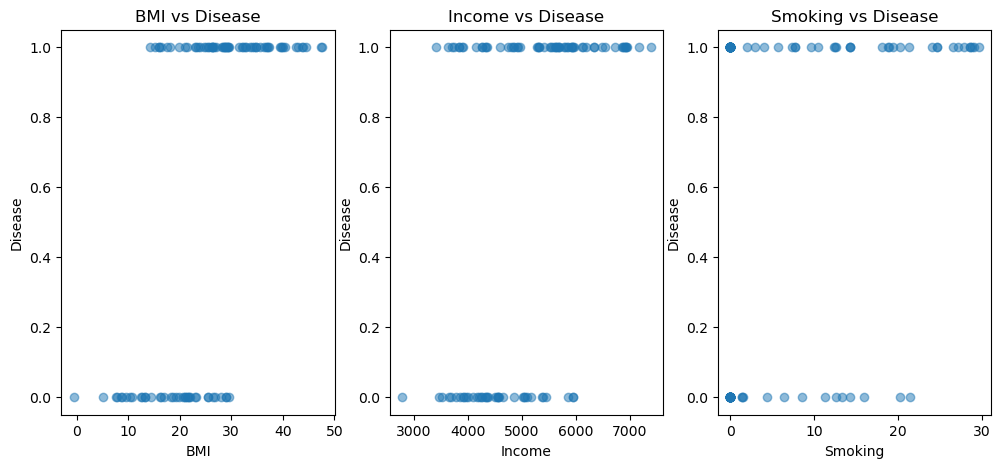

In [34]:
#시각화 함수 정의
def plotResult(df,x,y,ax):
    ax.scatter(df[x],df[y],alpha=0.5)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')

#시각화 함수 호출
fig,ax=plt.subplots(1,3,figsize=(12,5))
plotResult(df,'BMI','Disease',ax[0])
plotResult(df,'Income','Disease',ax[1])
plotResult(df,'Smoking','Disease',ax[2])

다중선형회귀모형 적용

In [35]:
formula_ols ='Disease~BMI+Income+Smoking'
model_ols=smf.ols(formula_ols,data=df).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                Disease   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     45.52
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           2.19e-18
Time:                        22:19:10   Log-Likelihood:                -25.376
No. Observations:                 100   AIC:                             58.75
Df Residuals:                      96   BIC:                             69.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0577      0.172     -6.139      0.0

결정계수 값 0.574크지 않음 -> 모형의 적합성이 낮음
모든 독립변수 t검정 시 p-value 유의수준보다 낮게 나옴 -> 회귀계수가 통계적으로 유의함       
ANOVA p-value<0.05 -> 회귀선은 통계적으로 유의함        
Kurtosis가 3과 차이가 큼 -> 정규성을 만족하지 못함   
- 회귀모형의 적합성이 낮으며 다중공선성의 문제가 있을 수 있음. 정규성을 만족하지 못함

이항 로지스틱 회귀모형

In [36]:
formula_logit ='Disease~BMI+Income+Smoking'
model_logit=smf.logit(formula_logit,data=df).fit()
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.052427
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                Disease   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                  0.9211
Time:                        22:19:10   Log-Likelihood:                -5.2427
converged:                       True   LL-Null:                       -66.406
Covariance Type:            nonrobust   LLR p-value:                 2.433e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -108.3577     44.759     -2.421      0.015    -196.084     -20.631
BMI            2.3690      0

Pseudo R-squ: 0.9211 -> 모형의 적합성 높음      
LLR p-value(우도비검정) < 0.05 -> 회귀 모형이 유의함        
z 검성 시 모든 계수의 p-value < 0.05 -> 회귀계수가 유의함       

실제값과 예측값 비교 시각화
- 혼동행렬
    - 혼동행렬을 통해 실제값과 예측값을 비교하여 모델의 성능을 평가할 수 있음
    - scikit-learn 라이브러리의 confusion_matrix 함수를 사용하여 혼동행렬을 생성

혼동행렬 시각화

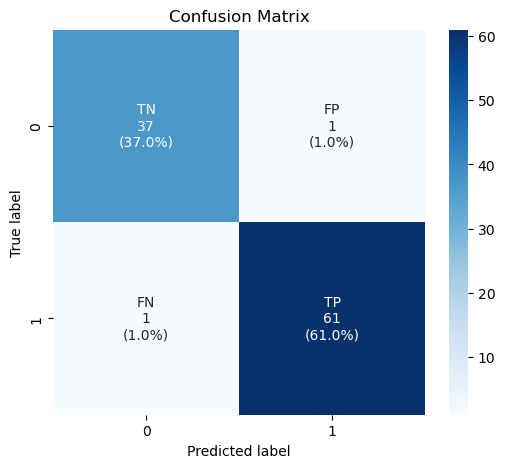

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#예측값 생성
df['Predicted Prob']=model_logit.predict()
df['predicted']=df['Predicted Prob']>0.5

#혼동행렬 계산
conf_matrix= confusion_matrix(df['Disease'],df['predicted'])

#어노테이션 설정
group_names=['TN','FP','FN','TP']
group_counts=[value for value in conf_matrix.flatten()]
group_percents=[f'{value:.1%}' for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels=[f'{v1}\n{v2}\n({v3})' for v1,v2,v3 in zip(group_names,group_counts, group_percents)]
labels=np.array(labels).reshape(2,2)
#시각화
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix,annot=labels,fmt='',cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

ROC 곡선 및 AUC 시각화
- ROC 곡선은 이진 분류 모델의 성능을 평가하는 데 사용되는 그래프

- ROC Curve는 이진 분류 모델의 성능을 평가하는 데 사용되는 그래프
    - x축: False Positive Rate(FPR)= FP/(FP+TN)
    - y축: True Positive Rate(TPR)= TP/(TP+FN)
- AUC는 ROC 곡선 아래 면적
    - AUC는 모형의 성능을 나타내는 지표로서 AUC 값이 1에 가까울수록 모델의 성능이 우수함

In [38]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import roc_curve, auc

#accuracy와 roc_auc 측정
print(f"Accuracy: {accuracy_score(df['Disease'], df['predicted']):0.4f}")
print(f"AUC: {roc_auc_score(df['Disease'],df['predicted']):0.4f}")

Accuracy: 0.9800
AUC: 0.9788


값이 1에 가까우므로 예측이 아주 정확한 것을 알 수 있음

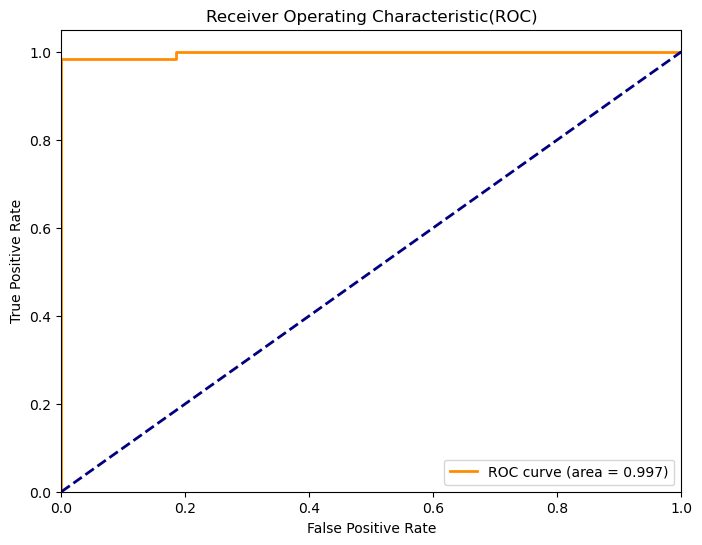

In [39]:
#FPR,TPR,Thresholds 계산
fpr, tpr, thresholds=roc_curve(df['Disease'],df['Predicted Prob'])

#AUC 계산
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (area = {roc_auc:0.3f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC)')
plt.legend(loc='lower right')
plt.show()

| 구분                                              | 계산 방식            | 입력값                       | 결과 의미                              |
| ----------------------------------------------- | ---------------- | ------------------------- | ---------------------------------- |
| `auc(fpr, tpr)`                                 | **ROC 곡선 아래 면적** | `df['Predicted Prob']` 사용 | **연속 확률 기반 AUC**                   |
| `roc_auc_score(df['Disease'], df['predicted'])` | **단일 점수 기반 AUC** | **0/1 예측값** 사용            | 정확히는 "AUC와 비슷하지만" 실제로는 **불연속적 결과** |
